### 495.Introdução a Clusterização Hierarquica
<h1>Clusterização Hierárquica</h1><h2>Características</h2><ul><li>Precisa de dados numéricos contínuos na mesma escala</li><li>Requer definição das separações entre clusters (parâmetro do modelo)</li><li>Gera os dendogramas (árvores invertidas que mostram a distância entre observações)</li></ul><h2>Vantagens</h2><ul><li>Possibilita a escolha visual dos clusters (não precisa especificar a quantidade)</li><li>Algoritmo simples e eficiente</li><li>Performa bem com poucos dados</li></ul><h2>Desvantagens</h2><ul><li>Não escala bem para grandes conjuntos de dados</li><li>Visualização fica ruim com muitos dados</li><li>Muito influenciável pela métrica de similaridade e método de linkage utilizados</li></ul><h2>Dendogramas</h2><ul><li>Organiza as observações de modo que as mais próximas fiquem lado a lado</li><li>Distância entre observações indicada no eixo Y<ul><li>Quanto mais alto, maior a distância</li><li>Quanto mais baixo, mais próximas estão</li></ul></li><li>Permite identificar visualmente grupos de observações semelhantes</li></ul><p>No próximo vídeo será explicado com mais detalhes o funcionamento do algoritmo de clusterização hierárquica.</p>

### 496. Compreendendo o funcionamento
<h1>Clusterização Hierárquica</h1><h2>Introdução</h2><ul><li>Método aglomerativo (bottom-up)</li><li>Começa com observações separadas e vai agrupando até formar um grupo só</li><li>Gera um dendograma</li></ul><h2>Funcionamento</h2><ul><li>Calcula matriz de distâncias entre observações</li><li>Identifica observações mais próximas e agrupa primeiro (ex: 7 e 5)</li><li>Usa o parâmetro &quot;linkage&quot; para definir como calcular a distância entre grupos<ul><li>Complete: distância máxima entre pontos dos grupos</li><li>Single: distância mínima</li><li>Average: média das distâncias</li><li>Centroid: distância entre centróides</li><li>Ward: soma das distâncias ao quadrado dentro dos grupos (mais utilizado)</li></ul></li></ul><h2>Exemplo</h2><ul><li>Mostra agrupando observações uma a uma no dendograma</li><li>Pode definir quantidade de grupos pelo dendograma ou por distância de corte</li></ul><h2>Vantagens</h2><ul><li>Visualização do dendograma permite interpretar semelhanças e diferenças</li></ul><h2>Conclusão</h2><ul><li>Parte prática na próxima aula</li></ul>

### 497. Clusterização Hierarquica na prática I
<h1>Equilibração Hierárquica</h1><h2>Introdução</h2><ul><li>Abordagem bottom-up e top-down</li><li>Vantagens e desvantagens</li></ul><h2>Simulação</h2><ul><li>80 observações, 2 características</li><li>4 grupos</li><li>Desvio padrão nos grupos</li></ul><h2>Algoritmo Scikit-Learn</h2><h3>Imports</h3><ul><li>cluster.AgglomerativeClustering</li><li>scipy.cluster.hierarchy</li></ul><h3>Parâmetros</h3><ul><li>n_clusters</li><li>retorna labels dos clusters</li></ul><h3>Exemplo</h3><ul><li>model.fit_predict(X)</li><li>Plot com cores por cluster</li></ul><h2>Comparação</h2><ul><li>Dados originais x com clusterização</li><li>Ajuste de dispersão dos clusters</li></ul>

In [11]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [12]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [13]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=80, n_features=2, centers=4, cluster_std=.6, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-1.710205,8.159010
1,-0.397014,2.109227
2,-1.148252,8.216479
3,2.334665,-0.024083
4,-1.347961,3.713714


In [14]:
# Hierarchical clustering with sklearn
model = AgglomerativeClustering(n_clusters=4)
labels = model.fit_predict(X)

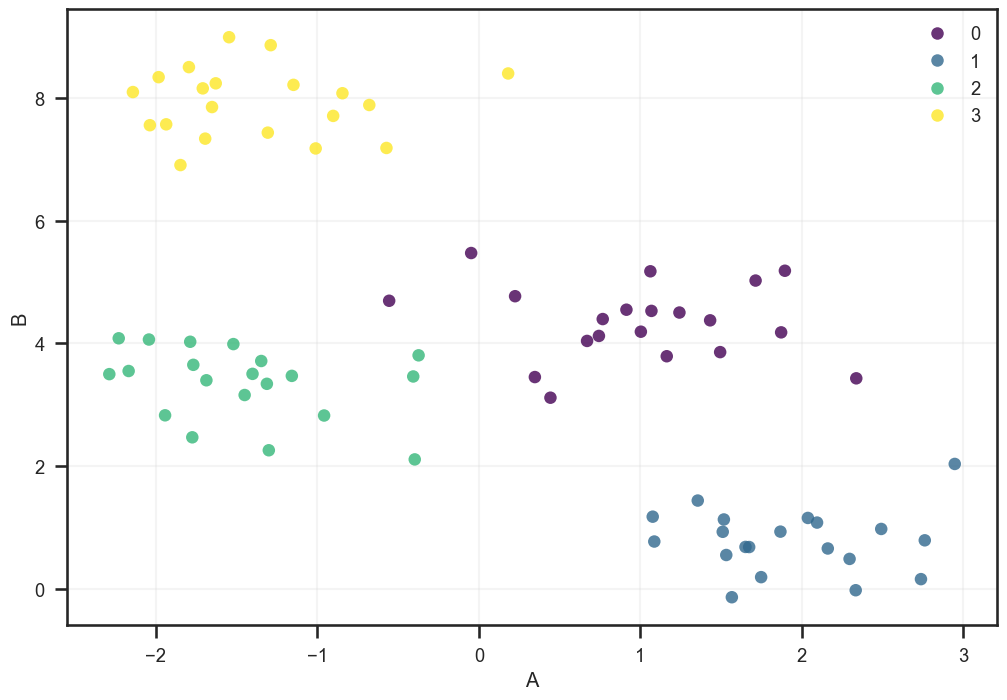

In [15]:
sns.scatterplot(data=df, x='A', y='B', hue=y, **scatter_kwargs);

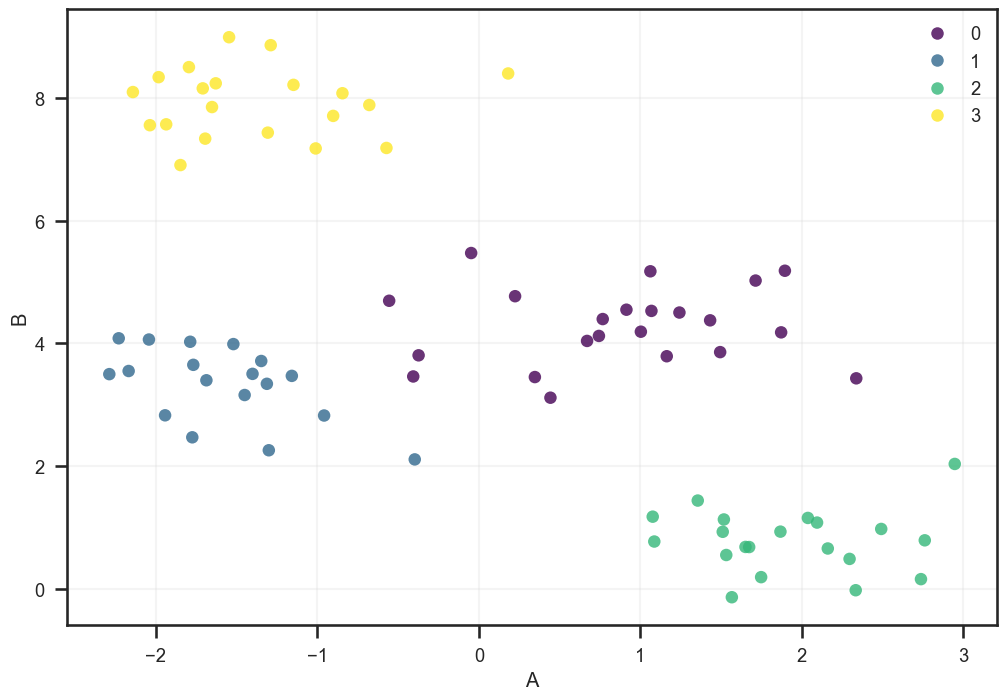

In [16]:
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs);

### 497. Clusterização Hierarquica na prática II
<h1>Tema central:</h1><p>Classificação hierárquica no Python utilizando SciPy</p><h2>Tópicos abordados:</h2><h3>Construção do dendrograma</h3><ul><li>Utiliza a matriz de distâncias <code>linkage</code></li><li>Passa o método <code>word</code> por padrão</li><li>Gera um objeto <code>Z</code> com a matriz de distâncias</li><li>Plota o dendrograma com essa matriz</li></ul><h3>Definição de grupos</h3><ul><li>Pode definir grupos cortando o dendrograma em um valor específico (ex: 10)</li><li>Ou pode usar a função <code>fcluster</code> para definir uma quantidade fixa de grupos (ex: 4 grupos)</li></ul><h3>Métodos de linkage</h3><ul><li><code>single</code>, <code>complete</code>, <code>centroid</code>, <code>ward</code> (padrão)</li><li>Cada um gera agrupamentos diferentes</li><li><code>complete</code> parece fazer mais sentido para esse conjunto de dados</li></ul><h3>Métricas de avaliação</h3><ul><li>Pode aplicar métricas como silhouette e Davies-Bouldin</li><li>Para avaliar a qualidade dos clusters</li></ul>

In [17]:
# Hierarchical clustering with scipy
linkage(df, method='ward').shape

(79, 4)

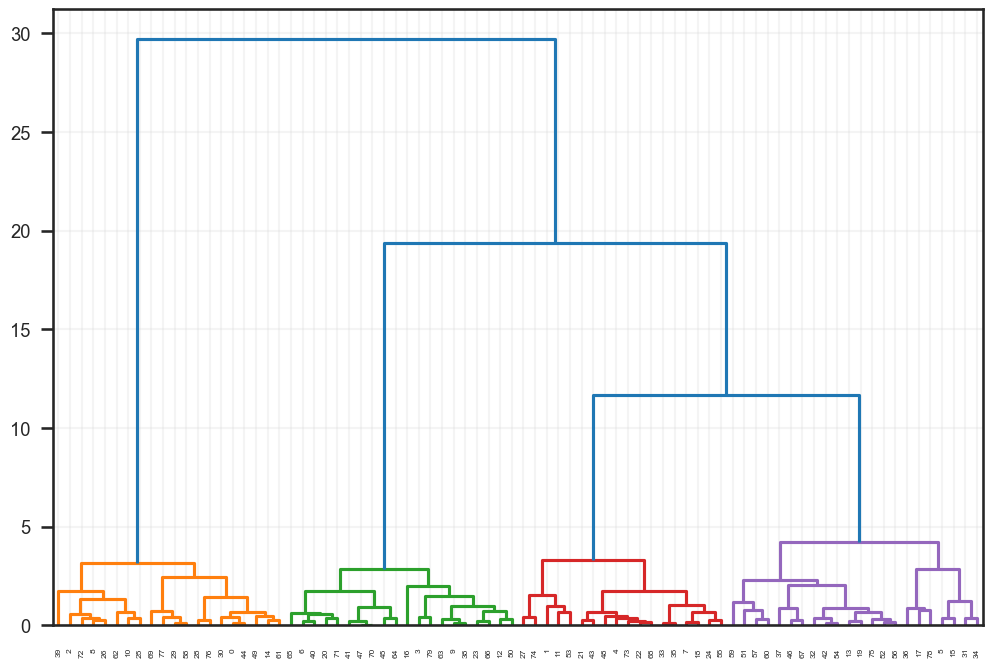

In [18]:
# Matriz de distância
Z= linkage(df, method='ward')
dendrogram_dict=dendrogram(Z, color_threshold=10)
plt.show()

In [19]:
# Passando a quantidade de Cluster que eu quero
fcluster(Z, 4, criterion='maxclust')

array([1, 3, 1, 2, 3, 4, 2, 3, 1, 2, 1, 3, 2, 4, 1, 4, 2, 4, 3, 4, 2, 3,
       3, 2, 3, 1, 1, 3, 1, 1, 1, 4, 4, 3, 4, 3, 4, 4, 2, 1, 2, 2, 4, 3,
       1, 2, 4, 2, 3, 1, 2, 4, 4, 3, 4, 3, 4, 4, 1, 4, 4, 1, 1, 2, 2, 2,
       2, 4, 3, 1, 2, 2, 1, 3, 3, 4, 1, 1, 4, 2], dtype=int32)

In [23]:
# Método interativo
@interact(method=['single','complete','centroid', 'ward'])
def plot_dendrogram(method):
  Z = linkage(df, method=method)
  dendrogram_dict = dendrogram(Z)
  plt.show()

interactive(children=(Dropdown(description='method', options=('single', 'complete', 'centroid', 'ward'), value…